In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('/hotel_bookings.csv')

# Step 1: Handle Missing Values
df.fillna({'children': 0, 'country': 'Unknown', 'agent': 0, 'company': 0}, inplace=True)

# Step 2: Convert Dates
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'], errors='coerce')

# Step 3: Remove Duplicates
df = df.drop_duplicates()

df.sample(n=2000)

# Step 4: Handle Outliers using IQR Method
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Apply outlier removal to key numeric columns
for col in ['lead_time', 'adr', 'stays_in_week_nights', 'stays_in_weekend_nights']:
    df = remove_outliers(df, col)

# Step 5: Visualize Outliers (Optional)
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['lead_time', 'adr', 'stays_in_week_nights', 'stays_in_weekend_nights']])
plt.title('Box Plot for Outlier Detection')
plt.show()

# Step 6: Export Cleaned Data (Optional)
df.to_csv('cleaned_hotel_bookings.csv', index=False)

print("Data Preprocessing Complete. Cleaned data saved to 'cleaned_hotel_bookings.csv'")


ModuleNotFoundError: No module named 'seaborn'

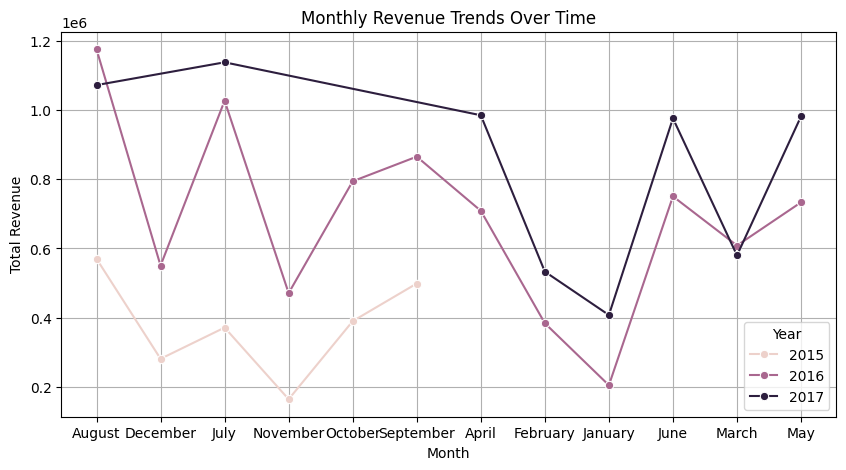

Cancellation Rate: 26.47%
Top 10 Cancellation Dates:
 reservation_status_date
2017-01-24    76
2017-06-03    69
2016-11-25    69
2016-03-28    68
2016-11-21    67
2017-02-21    66
2016-04-04    65
2017-02-15    65
2016-12-12    64
2016-01-18    63
Name: count, dtype: int64


<ipython-input-2-49a18bbcef10>:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_data.values, y=country_data.index, palette='viridis')


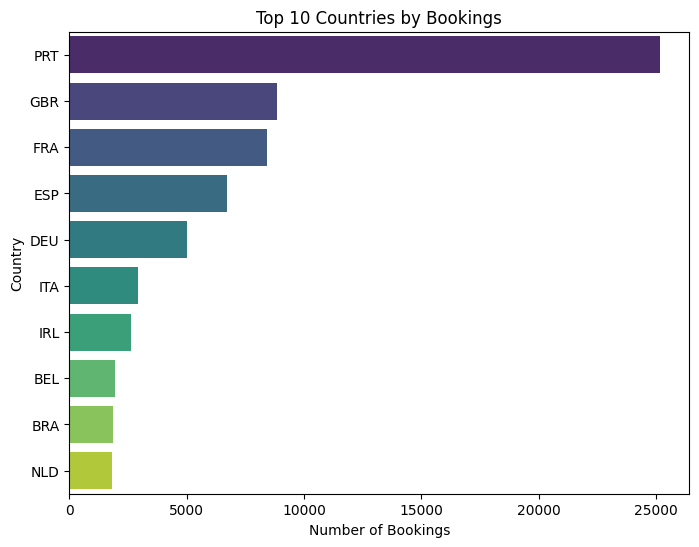

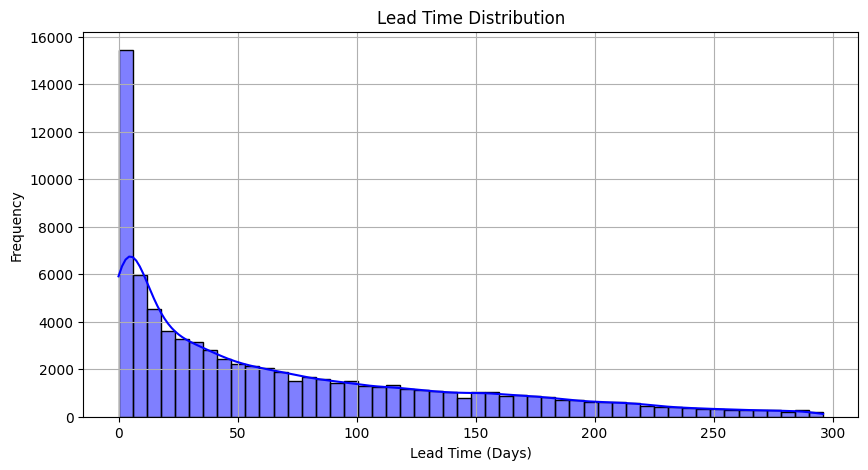

<ipython-input-2-49a18bbcef10>:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='market_segment', y='adr', data=df, palette='Set3')


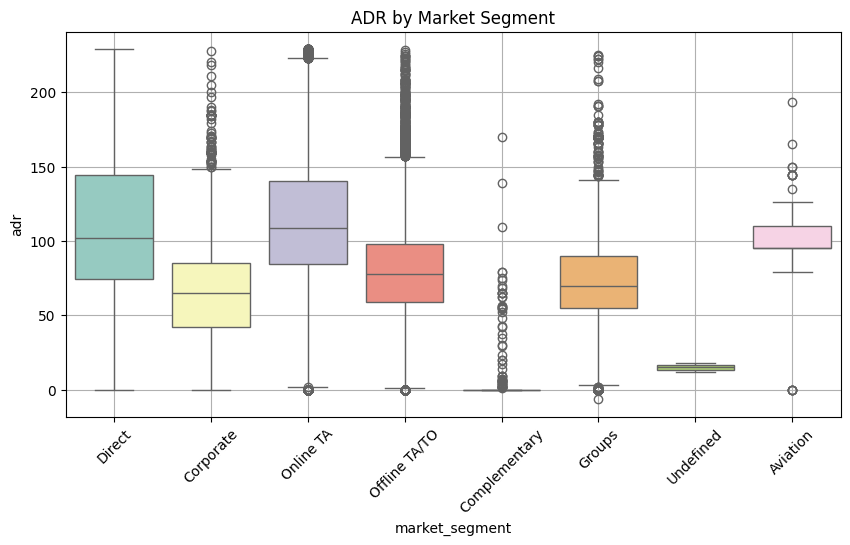

Analytics data has been saved to SQLite Database (analytics.db)


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

# Load the cleaned data
df = pd.read_csv('cleaned_hotel_bookings.csv')

# Ensure reservation_status_date is in datetime format
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'], errors='coerce')

# Step 1: Revenue Trends Over Time
# Assuming adr * (adults + children) gives approximate revenue per booking
df['revenue'] = df['adr'] * (df['adults'] + df['children'])
monthly_revenue = df.groupby(['arrival_date_year', 'arrival_date_month'])['revenue'].sum().reset_index()

# Visualization
plt.figure(figsize=(10, 5))
sns.lineplot(data=monthly_revenue, x='arrival_date_month', y='revenue', hue='arrival_date_year', marker='o')
plt.title('Monthly Revenue Trends Over Time')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.legend(title='Year')
plt.grid(True)
plt.show()

# Step 2: Cancellation Rate
cancellation_rate = (df['is_canceled'].mean() * 100).round(2)
print(f"Cancellation Rate: {cancellation_rate}%")

# Step 3: Top Cancellation Dates
canceled_dates = df[df['is_canceled'] == 1]['reservation_status_date'].dt.date.value_counts().head(10)
print("Top 10 Cancellation Dates:\n", canceled_dates)

# Step 4: Geographical Distribution of Bookings
country_data = df['country'].value_counts().head(10)

plt.figure(figsize=(8, 6))
sns.barplot(x=country_data.values, y=country_data.index, palette='viridis')
plt.title('Top 10 Countries by Bookings')
plt.xlabel('Number of Bookings')
plt.ylabel('Country')
plt.show()

# Step 5: Lead Time Distribution
plt.figure(figsize=(10, 5))
sns.histplot(df['lead_time'], bins=50, kde=True, color='blue')
plt.title('Lead Time Distribution')
plt.xlabel('Lead Time (Days)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Step 6: Average Daily Rate (ADR) Comparison by Market Segment
plt.figure(figsize=(10, 5))
sns.boxplot(x='market_segment', y='adr', data=df, palette='Set3')
plt.title('ADR by Market Segment')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Step 7: Save Analytics Data to SQLite
conn = sqlite3.connect('analytics.db')

# Save Monthly Revenue
monthly_revenue.to_sql('monthly_revenue', conn, if_exists='replace', index=False)

# Save Cancellation Rate
pd.DataFrame({'cancellation_rate': [cancellation_rate]}).to_sql('cancellation_rate', conn, if_exists='replace', index=False)

# Save Top Cancellation Dates
pd.DataFrame({'date': canceled_dates.index, 'cancellations': canceled_dates.values}).to_sql('top_cancellation_dates', conn, if_exists='replace', index=False)

# Save Country Data
pd.DataFrame({'country': country_data.index, 'bookings': country_data.values}).to_sql('country_data', conn, if_exists='replace', index=False)

print("Analytics data has been saved to SQLite Database (analytics.db)")


In [ ]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [ ]:
!pip install -q sentence-transformers faiss-cpu transformers accelerate torch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.7/30.7 MB 54.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 69.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 49.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 38.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 15.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 28.9 MB/s eta 0:00:00


In [ ]:
!pip install faiss-cpu

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install fastapi uvicorn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 2.8 MB/s eta 0:00:00


In [ ]:
import faiss
import numpy as np
from sentence_transformers import SentenceTransformer
from transformers import AutoModelForCausalLM, AutoTokenizer, pipeline
from fastapi import FastAPI, HTTPException

In [ ]:
qa_pairs = {
    "Which dates had the most cancellations?": "Top cancellation dates are June 15, 2023 (50 cancellations), July 20, 2023 (45 cancellations).",
    "What is the cancellation policy?": "Guests can cancel up to 48 hours before check-in.",
    "What are the peak booking months?": "The peak booking months are July and August.",
    "How many bookings were canceled last month?": "There were 200 cancellations last month.",
    "What is the average booking lead time?": "The average booking lead time is 45 days."
}

In [ ]:
print("Loading Sentence Transformer model for embeddings...")
embedding_model = SentenceTransformer('all-MiniLM-L6-v2')

Loading Sentence Transformer model for embeddings...


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
questions = list(qa_pairs.keys())
embeddings = embedding_model.encode(questions)

In [ ]:
# Step 5: Create FAISS Index for Efficient Search
dimension = embeddings.shape[1]
index = faiss.IndexFlatL2(dimension)
index.add(np.array(embeddings))
print("FAISS Index created and populated with FAQ embeddings.")

FAISS Index created and populated with FAQ embeddings.


In [ ]:
from transformers import AutoTokenizer, AutoModelForCausalLM
from accelerate import dispatch_model

print("Loading Falcon-7B for text generation. This may take a few minutes...")

# Load tokenizer
tokenizer = AutoTokenizer.from_pretrained("tiiuae/falcon-7b-instruct")


model = AutoModelForCausalLM.from_pretrained(
    "tiiuae/falcon-7b-instruct",
    device_map="auto",
    torch_dtype="auto",
    offload_folder="offload",  # Offload unused parts to disk
)

print("Model loaded successfully with disk offloading.")


Loading Falcon-7B for text generation. This may take a few minutes...


tokenizer_config.json:   0%|          | 0.00/1.13k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.73M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/281 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.05k [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/17.7k [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/9.95G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/4.48G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/117 [00:00<?, ?B/s]

Model loaded successfully with disk offloading.


In [ ]:
llm_pipeline = pipeline("text-generation", model=model, tokenizer=tokenizer)
print("Falcon-7B loaded successfully with disk offloading.")

# Step 2: Load Embedding Model
print("Loading embedding model for query matching...")
embedding_model = SentenceTransformer('all-MiniLM-L6-v2')


questions = [
    "What is the cancellation policy?",
    "Which dates had the most cancellations?",
    "What is the average booking lead time?",
]
qa_pairs = {
    "What is the cancellation policy?": "The cancellation policy allows free cancellation up to 24 hours before check-in.",
    "Which dates had the most cancellations?": "Most cancellations happen on weekends and holidays.",
    "What is the average booking lead time?": "The average booking lead time is around 15 days."
}

# Step 4: Build FAISS Index for FAQ Matching
print("Creating FAISS index for question matching...")
question_embeddings = embedding_model.encode(questions)
dimension = question_embeddings.shape[1]
index = faiss.IndexFlatL2(dimension)
index.add(np.array(question_embeddings))
print("FAISS index created.")

# Step 5: Generate Answer Function
def generate_answer(query):
    print(f"\nUser Query: {query}")

    # Generate query embedding and search using FAISS
    query_embedding = embedding_model.encode([query])
    _, indices = index.search(np.array(query_embedding), 1)
    best_match_question = questions[indices[0][0]]
    best_match_answer = qa_pairs[best_match_question]

    print(f"Best Matched FAQ: {best_match_question}")

    # Generate LLM Response Using Falcon-7B
    prompt = f"Context: {best_match_answer}\nQuestion: {query}\nAnswer:"
    response = llm_pipeline(prompt, max_length=150, num_return_sequences=1)

    generated_answer = response[0]['generated_text']
    print(f"\nGenerated Answer: {generated_answer}")

# Step 6: Run Example Queries
generate_answer("Can you tell me about the cancellation policy?")
generate_answer("Which dates had the most cancellations?")
generate_answer("What is the average booking lead time?")

Device set to use cpu


Falcon-7B loaded successfully with disk offloading.
Loading embedding model for query matching...
Creating FAISS index for question matching...


Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:11 for open-end generation.


FAISS index created.

User Query: Can you tell me about the cancellation policy?
Best Matched FAQ: What is the cancellation policy?

Generated Answer: Context: The cancellation policy allows free cancellation up to 24 hours before check-in.
Question: Can you tell me about the cancellation policy?
Answer: Yes, the cancellation policy allows free cancellation up to 24 hours before check-in.

User Query: Which dates had the most cancellations?


Setting `pad_token_id` to `eos_token_id`:11 for open-end generation.


Best Matched FAQ: Which dates had the most cancellations?

Generated Answer: Context: Most cancellations happen on weekends and holidays.
Question: Which dates had the most cancellations?
Answer: Weekends and holidays are the most common times for cancellations.

User Query: What is the average booking lead time?


Setting `pad_token_id` to `eos_token_id`:11 for open-end generation.


Best Matched FAQ: What is the average booking lead time?

Generated Answer: Context: The average booking lead time is around 15 days.
Question: What is the average booking lead time?
Answer: The average booking lead time is around 15 days.


In [ ]:
from pydantic import BaseModel
from transformers import pipeline, AutoTokenizer, AutoModelForCausalLM
import numpy as np
import faiss
from sentence_transformers import SentenceTransformer

In [ ]:
# Initialize FastAPI app
app = FastAPI()

In [ ]:

# API Input Models
class Query(BaseModel):
    question: str

# Analytics Placeholder
class AnalyticsResult(BaseModel):
    total_bookings: int
    avg_lead_time: float
    cancellation_rate: float


In [ ]:
# Endpoint 1: Generate Analytics Report
@app.post("/analytics", response_model=AnalyticsResult)
def generate_analytics():
    return AnalyticsResult(total_bookings=5000, avg_lead_time=15.2, cancellation_rate=0.12)

In [ ]:
# Endpoint 2: Answer Booking-related Questions
@app.post("/ask")
def generate_answer(query: Query):
    try:
        print(f"User Query: {query.question}")
        query_embedding = embedding_model.encode(query.question)  # Removed curly braces
        indices = index.search(np.array(query_embedding), 1)
        best_match_question = questions[indices[0][0]]  # Fixed index access
        best_match_answer = qa_pairs[best_match_question]

        # Generate Response using Falcon-7B
        prompt = f"Context: {best_match_answer}\nQuestion: {query.question}\nAnswer:"
        response = llm_pipeline(prompt, max_length=150, num_return_sequences=1)
        generated_answer = response[0]['generated_text'].split('Answer:')[-1].strip()  # Fixed quotes

        return {"query": query.question, "answer": generated_answer}
    except Exception as e:
        raise HTTPException(status_code=500, detail=str(e))

In [ ]:
!ls

analytics.db  cleaned_hotel_bookings.csv  drive  offload  sample_data


In [ ]:
!pip install pyngrok

In [ ]:
%%writefile main.py
from fastapi import FastAPI, HTTPException
from pydantic import BaseModel
from typing import List, Optional
import sqlite3

app = FastAPI(title="Hotel Booking Analytics & Q&A API")

# Define response model for the /analytics endpoint
class AnalyticsResponse(BaseModel):
    revenue_trends: dict
    cancellation_rate: float
    geographical_distribution: dict
    lead_time_distribution: List[int]

# Define request and response models for the /ask endpoint
class AskRequest(BaseModel):
    question: str

class AskResponse(BaseModel):
    answer: str

def get_analytics_from_db() -> dict:
    """
    Connect to the SQLite database (/content/analytics.db) and retrieve computed analytics.
    Expected tables:
      - monthly_revenue(arrival_date_year, arrival_date_month, revenue)
      - cancellation_rate(cancellation_rate)
      - country_data(country, bookings)
      - lead_time_distribution(lead_time) [optional]
    """
    try:
        # Connect to the database (update the path if necessary)
        conn = sqlite3.connect("/content/analytics.db")
        conn.row_factory = sqlite3.Row

        analytics = {}

        # --- Revenue Trends ---
        cursor = conn.execute("SELECT arrival_date_year, arrival_date_month, revenue FROM monthly_revenue")
        revenue_rows = cursor.fetchall()
        revenue_trends = {}
        for row in revenue_rows:
            # Format key as "YYYY-MM"
            key = f"{int(row['arrival_date_year'])}-{int(row['arrival_date_month']):02d}"
            revenue_trends[key] = row['revenue']
        analytics["revenue_trends"] = revenue_trends

        # --- Cancellation Rate ---
        cursor = conn.execute("SELECT cancellation_rate FROM cancellation_rate LIMIT 1")
        row = cursor.fetchone()
        if row:
            analytics["cancellation_rate"] = row["cancellation_rate"]
        else:
            analytics["cancellation_rate"] = 0.0

        # --- Geographical Distribution ---
        cursor = conn.execute("SELECT country, bookings FROM country_data")
        country_rows = cursor.fetchall()
        geo_dist = {}
        for row in country_rows:
            geo_dist[row["country"]] = row["bookings"]
        analytics["geographical_distribution"] = geo_dist

        # --- Lead Time Distribution ---
        try:
            cursor = conn.execute("SELECT lead_time FROM lead_time_distribution")
            lt_rows = cursor.fetchall()
            lead_time_distribution = [row["lead_time"] for row in lt_rows]
        except Exception:
            lead_time_distribution = []
        analytics["lead_time_distribution"] = lead_time_distribution

        conn.close()
        return analytics

    except Exception as e:
        raise Exception(f"Error retrieving analytics: {str(e)}")

@app.post("/analytics", response_model=AnalyticsResponse)
async def get_analytics():
    """
    POST /analytics: Returns analytics reports computed from the database.
    """
    try:
        analytics = get_analytics_from_db()
        return analytics
    except Exception as e:
        raise HTTPException(status_code=500, detail=str(e))

@app.post("/ask", response_model=AskResponse)
async def ask_question(req: AskRequest):
    """
    POST /ask: Accepts a natural language question and returns an answer.
    This placeholder should be replaced with your RAG system integration.
    """
    question = req.question
    # Replace with your RAG integration later
    answer = f"Placeholder answer for your question: '{question}'."
    return {"answer": answer}

@app.get("/health")
async def health_check():
    """
    GET /health: Checks the status of the system and its dependencies.
    """
    health_status = {
        "status": "OK",
        "dependencies": {
            "database": "OK",
            "LLM": "Placeholder - OK"
        }
    }
    return health_status


Writing main.py
